In [ ]:
#Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#Defining paths to training and testing datasets
train_dir = "/content/drive/MyDrive/SkinDataset/train/"
test_dir  = "/content/drive/MyDrive/SkinDataset/test/"

In [ ]:
#importing reqd. libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 0 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


In [ ]:
#Create CNN model for skin disease classification
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')   # 4 skin classes
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [22]:
#train the CNN model
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.2500 - loss: 2.5450 - val_accuracy: 0.2500 - val_loss: 1.5465
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 722ms/step - accuracy: 0.0556 - loss: 2.8075 - val_accuracy: 0.2500 - val_loss: 1.4486
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.1111 - loss: 1.9089 - val_accuracy: 0.2500 - val_loss: 1.4397
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2500 - loss: 1.4020 - val_accuracy: 0.2500 - val_loss: 1.3943
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3056 - loss: 1.3957 - val_accuracy: 0.5000 - val_loss: 1.3804
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3333 - loss: 1.3706 - val_accuracy: 0.2500 - val_loss: 1.3928
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 976ms/step - accuracy: 0.1667 - loss: 1.4706 - val_accuracy: 0.2500 - val_loss: 1.3546
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 973ms/step - accuracy: 0.1944 - loss: 1.3584 - val_accuracy: 0.2500 - val_loss: 1.3460
Epoch 9

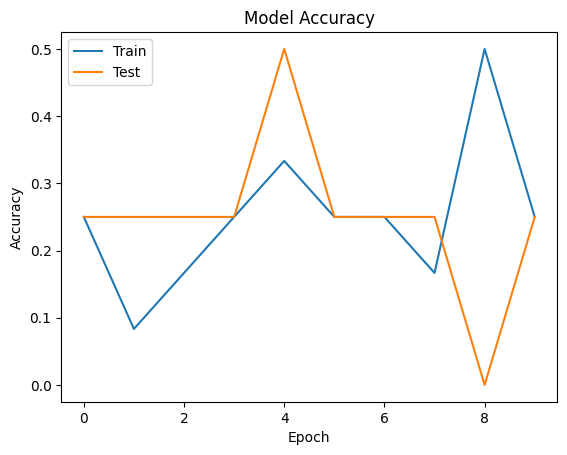

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"])
plt.show()


In [24]:
model.save("/content/drive/MyDrive/skin_model.h5")


In [29]:
#testing the model with a new image which wasnt used in the training
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img("/content/drive/MyDrive/SkinDataset/test/melanoma/sample.jpg", target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

prediction = model.predict(img)
print("Prediction:", prediction)
print("Class:", train_data.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediction: [[0.3658132  0.3269834  0.15836407 0.14883934]]
Class: {'ak': 0, 'bcc': 1, 'melanoma': 2, 'vl': 3}
